# Actividad 2 INFO183

#### Instrucciones generales

- Complete este cuadernillo jupyter con sus códigos y respuestas
- Se trabajará en grupos de tres personas
- Se entrega un cuadernillo por grupo
- La entrega es a través de correo electrónico a phuijse@inf.uach.cl
- La fecha de entrega es el Lunes 16 de Marzo a las 23:59
- Use las librerías `scipy`, `numpy` y `matplotlib`

### Nombre completo de los integrantes: 
- Francisco Levin
- Gonzalo Silva
- Rodrigo Zambrano

## Parte 0: Responda las siguientes preguntas sobre sistemas LTI

**Q:** ¿Qué es la respuesta al impulso de un sistema? 

- La respuesta a un impulso o respuesta impulsional de un sistema es la que se presenta en la salida cuando en la entrada se introduce un impulso, este impulso tambien es conocido como delta de Kronecker δ[n].

**Q:** ¿Qué relación tiene la respuesta al impulso con la respuesta en frecuencia?

- La relacion entre la respuesta al impulso y la respuesta en frecuencia es que si a la respuesta en frecuencia le aplicamos la transformada de fourier obtenemos de la respuesta al impulso.

**Q:** ¿Qué es un sistema LTI y por qué es conveniente estudiarlos en el dominio de la frecuencia?

- Es un sistema que permanece invariante en el tiempo. Es conveniente estudiarlos en el dominio ya que se tiene una interpretaciòn directa del sistema

**Q:** Escriba  la  ecuación  de  un  sistema  FIR  general  de $L+ 1$ coeficientes


$$
x = y + z
$$

**Q:** Describa paso a paso el método de enventanado para diseñar filtros FIR

Podemos diseñar un filtro FIR siguiendo estos pasos

- Especificar una respuesta en frecuencia ideal  𝐻𝑑[𝑘] 
- Usar la transformada de Fourier inversa para obtener la respuesta al impulso ideal  ℎ𝑑[𝑛] 
- Truncar la respuesta al impulso ideal usando una ventana tal que  ℎ[𝑛]=ℎ𝑑[𝑛]𝑤[𝑛] 
- ℎ[𝑛]  nos da los coeficientes del filtro FIR y w[n] nos da el largo del filtro

### Enunciado: Análisis y limpieza de un Electrocardiograma

Un **electrocardiograma (ECG)** es un gráfico de voltaje (amplitud) versus tiempo correspondiente a la actividad eléctrica del corazón. El ECG se usa para estudiar el ritmo cardiaco. Un humano normal tiene un ritmo cardiáco entre **60 y 100 latidos por minuto**. 

Considere la siguiente señal de electrocardiograma (ECG) medida en miliVolts [mV] y cuya frecuencia de muestreo es $F_s = 360 Hz$

<IPython.core.display.Javascript object>


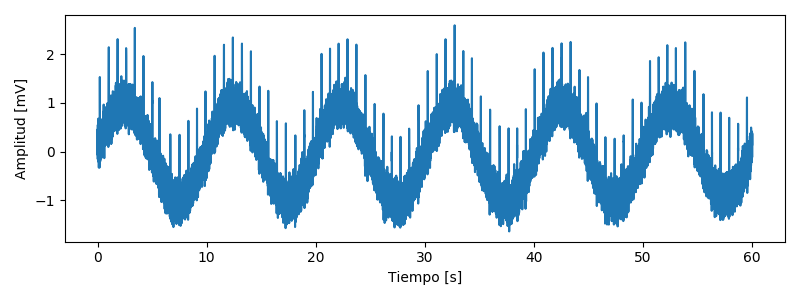

In [2]:
import numpy as np
import pickle
%matplotlib notebook
import matplotlib.pylab as plt

with open("ECG.pkl", "rb") as f:
    data = pickle.load(f)

fig, ax = plt.subplots(figsize=(8, 3), tight_layout=True)
ax.plot(np.arange(len(data))/360, data)
ax.set_xlabel('Tiempo [s]')
ax.set_ylabel('Amplitud [mV]');


Durante el proceso de captura ciertos errores provocaron que la señal se contaminara con

- Un ruido en torno a la frecuencia del sistema eléctrico
- Un ruido de baja frecuencia (tendencia) causado por un desperfecto del sensor
- Un ruido térmico que aparece en todo el rango de frecuencias (blanco)

Esto complica el análisis del médico por lo que el el hospital base de Valdivia los contrata a ustedes para **diseñar un filtro que limpie la señal ECG**

Resuelva las actividades que se piden a continuación, respondiendo y analizando donde corresponda

## Paso 1: Análisis de un ECG

Antes de diseñar el filtro visualize la señal en el espacio de frecuencias

Dado que la ECG es una **señal no estacionaria** lo más adecuado es estudiar su **espectrograma**: estimador del espectro de magnitud en función del tiempo

Utilize `scipy.signal.spectrogram` para visualizar el espectrograma del ECG

- Especifique la frecuencia de muestreo adecuadamente
- Utilice un largo de ventana (segmento) de 5x360 (5 segundos) y un traslape  (overlap) de 4x360 (4 segundos)
- Mejore la visualización utilizando el logaritmo del espectrograma (sume un pequeño factor 1e-5 para evitar indeficiones)

<IPython.core.display.Javascript object>


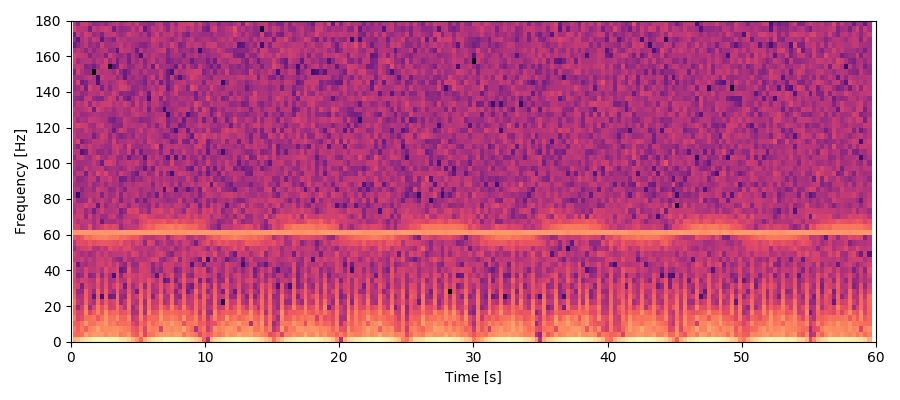

In [3]:
import numpy as np
import scipy.signal
from scipy import fftpack
%matplotlib notebook
import matplotlib.pylab as plt
from matplotlib import animation, patches
from IPython.display import display, Audio, HTML
import pickle

with open("ECG.pkl", "rb") as f:
    data = pickle.load(f)
    

fig, ax = plt.subplots(figsize=(9, 4), tight_layout=True)
freq, ttimes, Sxx = scipy.signal.spectrogram(data, fs=360,window=('tukey', 0.25), 
                                             nperseg=120, noverlap=None, detrend=False,
                                             return_onesided=True, scaling='density', mode='magnitude')
ax.pcolormesh(ttimes, freq, 20*np.log10(Sxx+1e-5), cmap=plt.cm.magma);ax.set_xlim([0.0,60]);ax.set_xlabel('Time [s]'); ax.set_ylabel('Frequency [Hz]');



#### Considerando el ritmo cardiaco de un ser humano normal y estudiando el espectrograma obtenido, responda: 

**Q:** ¿En qué rango de frecuencias (Hz) del espectrograma se espera encontrar la señal de ritmo cardiaco? 

- Analizando el espectrograma obtenido anteriormente se espera encontrar el ritmo cardioca en un rango de frecuencias entre 0 [Hz] Y 45 [Hz].

**Q:** Identifique y describa el comportamiento espectral de las dos fuentes de ruido que se encuentran en el espectrograma

 - Observando el espectrograma se pueden identifcar varios cambios de frecuencias en el tiempo significativos, el primero tiene una tendencia a una frecuencia de 60 [Hz] y por lo que se sabe acerca de los ruidos del tipo electrico tienden a osicilar entre 50 [Hz] y 60 [Hz] por lo que ese ruido debe ser producido por el sistema electrico.
 - El otro ruido que se puede identificar esta en frecuencias muy bajas entre 0 [Hz] y 5 [Hz] a lo que deberia tratarse del ruido producido por el desperfecto del sensor que se uso para tomar los datos.

**Q:** Si tuviera que diseñar un filtro para eliminar este ruido, ¿De qué tipo sería? ¿Cuál o cuáles serían sus frecuencias de corte [Hz]?

- Los ruidos que se encontraron tienen la caracteristica de estar separados por un rango alto de frecuencias, uno esta osiclando en los 60 [Hz] y mientras el otro en los 5 [Hz]. Por lo tanto se utilizaria un filtro de tipo pasa banda (BPF) ya que dejariamos pasar solo una banda de frecuencias que es la que necesitamos en el estudio. La frecuencia de corte del tipo $f_{c2}$ seria 50 [Hz] y la de $f_{c1}$ seria 5 [Hz].

**Q:** ¿Es posible eliminar completamente el ruido blanco con un filtro en frecuencia? ¿Por qué?

- No, por que para poder eliminar el ruido completamente se deberia hacer un filtro por cada frecuencia ya que este tipo de ruido abarca a todas la frecuencias y en todas de ellas muestran las mismas potencias.

## Paso 2: Filtrado de un ECG

Diseñe un filtro para eliminar el ruido encontrado en el punto anterior considerando el tipo de filtro y la/las frecuencia/s de corte que especificó en el paso anterior

Obtenga la respuesta al impulso del filtro con la función `scipy.signal.firwin`. Utilice las ventanas `boxcar` (rectangular) y `hamming`. Consideré un número de coeficientes (`ntaps`) de 500 y 1000. Esto corresponde a 4 filtros. 

- Muestre en un gráfico la magnitud de la respuesta en frecuencia de los 4 filtros (use `scipy.signal.freqz`). Destaque las diferencias y semejanzas entre las respuestas en frecuencia contrastando con la teoría.

Filtre la señal convolucionando con la respuesta al impulso obtenida. Puede usar `scipy.signal.convolve` con `mode="same"`

- Para cada filtro: Grafique la señal filtrada y su espectrograma. Discuta sobre la efectividad del filtro
- Mida el tiempo que demora convolucionar la señal con cada filtro y construya una tabla (ver ejemplo) ¿Cuál es el filtro más eficiente? ¿Cuál es el menos eficiente?

<IPython.core.display.Javascript object>


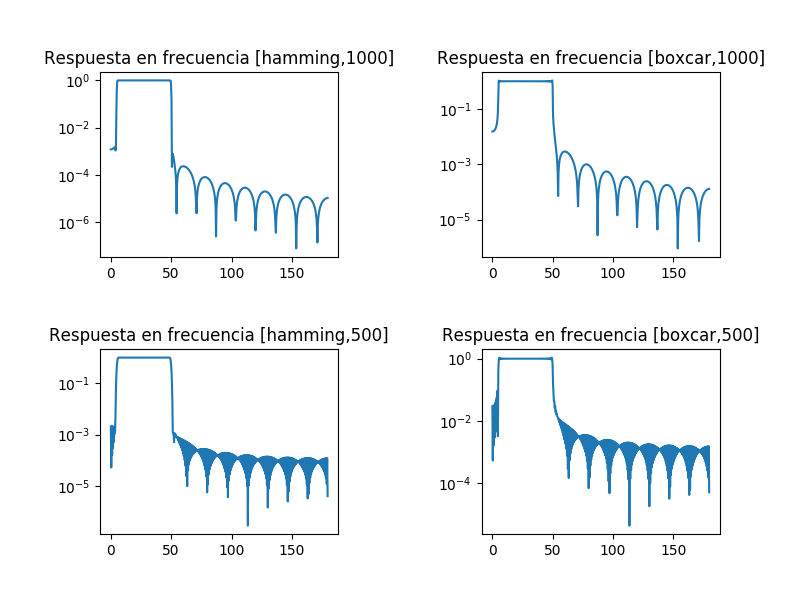

In [32]:
h1 = scipy.signal.firwin(numtaps=1000+1, cutoff=[5, 50], 
                        pass_zero=False, window='hamming',
                        fs=360)
h5 = scipy.signal.firwin(numtaps=500+1, cutoff=[5, 50], 
                        pass_zero=False, window='hamming',
                        fs=360)
b1 = scipy.signal.firwin(numtaps=1000+1, cutoff=[5, 50], 
                        pass_zero=False, window='boxcar',
                        fs=360)
b5 = scipy.signal.firwin(numtaps=500+1, cutoff=[5, 50], 
                        pass_zero=False, window='boxcar',
                        fs=360)

freq1, response1 = scipy.signal.freqz(h1);
freq2, response2 = scipy.signal.freqz(h5);
freq3, response3 = scipy.signal.freqz(b1);
freq4, response4 = scipy.signal.freqz(b5);

plt.close('all'); fig = plt.figure(figsize=(8, 6))

ax1 = plt.subplot2grid((2, 2), (0, 0)); ax1.set_title("Respuesta en frecuencia [hamming,1000]")
ax2 = plt.subplot2grid((2, 2 ), (1, 0)); ax2.set_title("Respuesta en frecuencia [hamming,500]")
ax3 = plt.subplot2grid((2, 2 ), (0, 1)); ax3.set_title("Respuesta en frecuencia [boxcar,1000]")
ax4 = plt.subplot2grid((2, 2 ), (1, 1)); ax4.set_title("Respuesta en frecuencia [boxcar,500]")

ax1.semilogy(0.5*360*freq1/np.pi, np.abs(response1));
ax2.semilogy(0.5*360*freq2/np.pi, np.abs(response2));
ax3.semilogy(0.5*360*freq3/np.pi, np.abs(response3));
ax4.semilogy(0.5*360*freq4/np.pi, np.abs(response4));
plt.subplots_adjust(wspace= 0.6,hspace=0.5)

#CONVOLUCION DE CADA SEÑAL
data_filt1 = scipy.signal.convolve(data, h1)
data_filt2 = scipy.signal.convolve(data, h5)
data_filt3 = scipy.signal.convolve(data, b1)
data_filt4 = scipy.signal.convolve(data, b5)

<IPython.core.display.Javascript object>


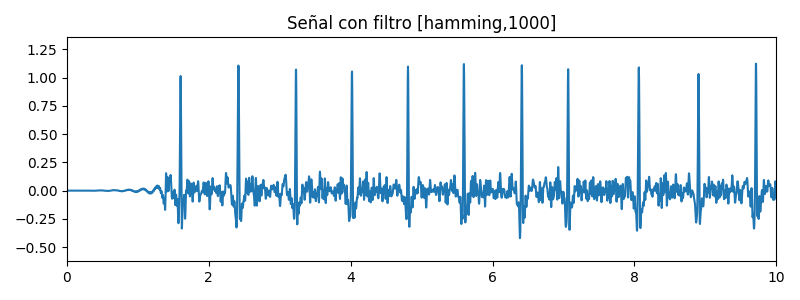

<IPython.core.display.Javascript object>


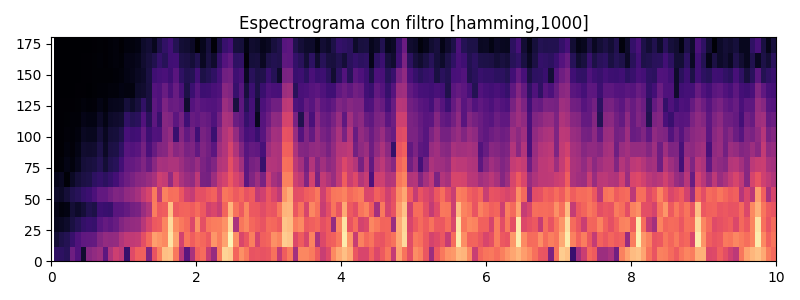

In [29]:
#GRAFICO DE HAMMING 1000

fig, ax1 = plt.subplots(figsize=(8, 3), tight_layout=True);ax1.set_title("Señal con filtro [hamming,1000]")
fig, ax2 = plt.subplots(figsize=(8, 3), tight_layout=True);ax2.set_title("Espectrograma con filtro [hamming,1000]")
ax1.plot(np.arange(len(data_filt1))/360, data_filt1);ax1.set_xlim([0.0,10]);
freq1, ttimes1, Sxx1 = scipy.signal.spectrogram(data_filt1, fs=360,window=('tukey', 0.25), 
                                             nperseg=30, noverlap=None, detrend=False,
                                             return_onesided=True, scaling='density', mode='magnitude')

ax2.pcolormesh(ttimes1, freq1, 20*np.log10(Sxx1+1e-5), cmap=plt.cm.magma);ax2.set_xlim([0.0,10]);

<IPython.core.display.Javascript object>


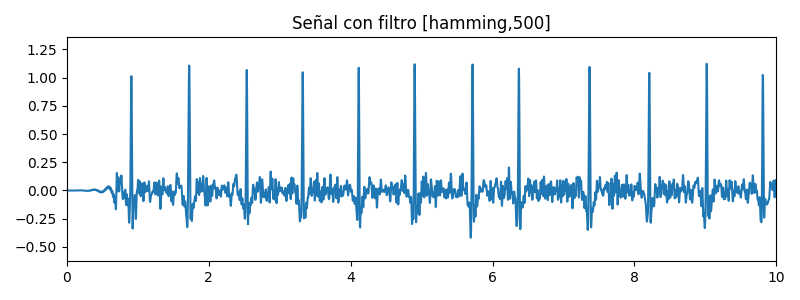

<IPython.core.display.Javascript object>


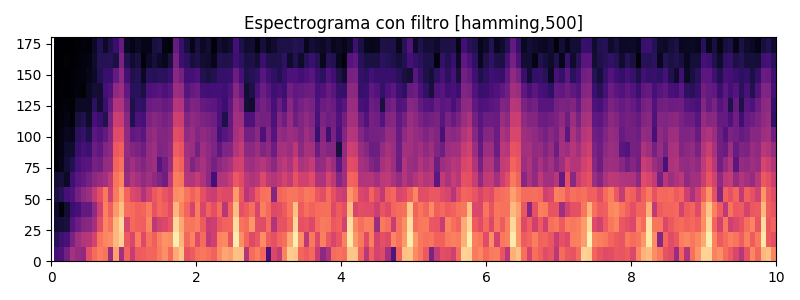

In [30]:
#GRAFICO DE HAMMING 500

fig, ax1 = plt.subplots(figsize=(8, 3), tight_layout=True);ax1.set_title("Señal con filtro [hamming,500]")
fig, ax2 = plt.subplots(figsize=(8, 3), tight_layout=True);ax2.set_title("Espectrograma con filtro [hamming,500]")
ax1.plot(np.arange(len(data_filt2))/360, data_filt2);ax1.set_xlim([0.0,10]);
freq2, ttimes2, Sxx2 = scipy.signal.spectrogram(data_filt2, fs=360,window=('tukey', 0.25), 
                                             nperseg=30, noverlap=None, detrend=False,
                                             return_onesided=True, scaling='density', mode='magnitude')
ax2.pcolormesh(ttimes2, freq2, 20*np.log10(Sxx2+1e-5), cmap=plt.cm.magma);ax2.set_xlim([0.0,10]);

<IPython.core.display.Javascript object>


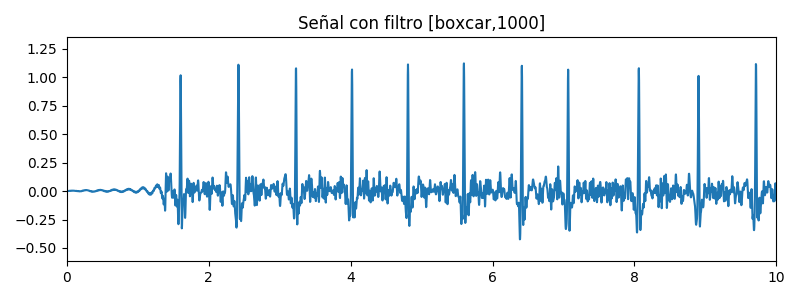

<IPython.core.display.Javascript object>


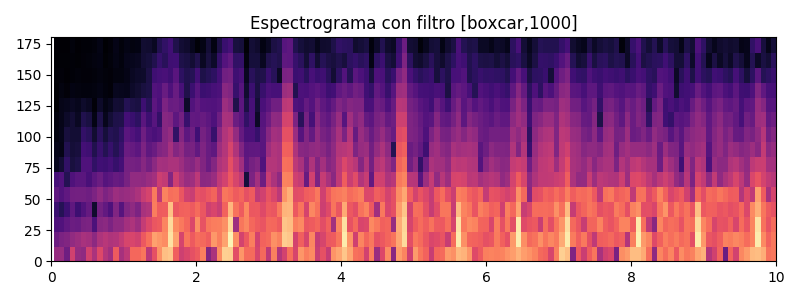

In [25]:
#GRAFICO DE BOXCAR 1000

fig, ax1 = plt.subplots(figsize=(8, 3), tight_layout=True);ax1.set_title("Señal con filtro [boxcar,1000]")
fig, ax2 = plt.subplots(figsize=(8, 3), tight_layout=True);ax2.set_title("Espectrograma con filtro [boxcar,1000]")
ax1.plot(np.arange(len(data_filt3))/360, data_filt3);ax1.set_xlim([0.0,10]);
freq3, ttimes3, Sxx3 = scipy.signal.spectrogram(data_filt3, fs=360,window=('tukey', 0.25), 
                                             nperseg=30, noverlap=None, detrend=False,
                                             return_onesided=True, scaling='density', mode='magnitude')
ax2.pcolormesh(ttimes3, freq3, 20*np.log10(Sxx3+1e-5), cmap=plt.cm.magma);ax2.set_xlim([0.0,10]);

<IPython.core.display.Javascript object>


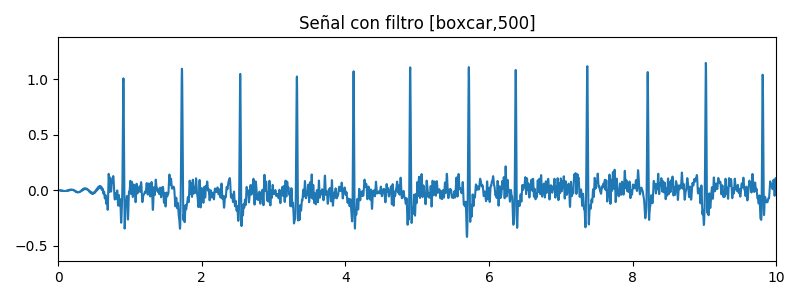

<IPython.core.display.Javascript object>


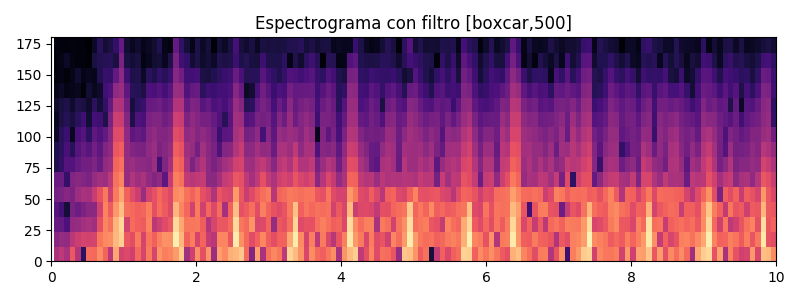

In [31]:
#GRAFICO DE BOXCAR 500

fig, ax1 = plt.subplots(figsize=(8, 3), tight_layout=True);ax1.set_title("Señal con filtro [boxcar,500]")
fig, ax2 = plt.subplots(figsize=(8, 3), tight_layout=True);ax2.set_title("Espectrograma con filtro [boxcar,500]")
ax1.plot(np.arange(len(data_filt4))/360, data_filt4);ax1.set_xlim([0.0,10]);
freq4, ttimes4, Sxx4 = scipy.signal.spectrogram(data_filt4, fs=360,window=('tukey', 0.25), 
                                             nperseg=30, noverlap=None, detrend=False,
                                             return_onesided=True, scaling='density', mode='magnitude')
ax2.pcolormesh(ttimes4, freq4, 20*np.log10(Sxx4+1e-5), cmap=plt.cm.magma);ax2.set_xlim([0.0,10]);


# Analisis de los filtros
- Se puede observar que cada filtro tiene un resultado bastante identico y mas aun si se trata de los mismos coeficientes que se usaron (500 y 1000). Todos los filtos lograron quitar casi por completo los ruidos producidos por las maquinas pero aun asi no logra quedar lo mas limpia posible, esto debe ser por el ruido blanco que habia al momento de tomar las muestras que aun interfiere aunque sea de menor manera.

In [9]:
# TIEMPO EN CONVOLUCIONAR
def ejemplo(x, y):
    return scipy.signal.convolve(x, y)

%timeit -n1 -r3 ejemplo(data, h1)
%timeit -n1 -r3 ejemplo(data, h5)
%timeit -n1 -r3 ejemplo(data, b1)
%timeit -n1 -r3 ejemplo(data, b5)

3.62 ms ± 201 µs per loop (mean ± std. dev. of 3 runs, 1 loop each)
2.84 ms ± 242 µs per loop (mean ± std. dev. of 3 runs, 1 loop each)
3.03 ms ± 395 µs per loop (mean ± std. dev. of 3 runs, 1 loop each)
3.18 ms ± 625 µs per loop (mean ± std. dev. of 3 runs, 1 loop each)


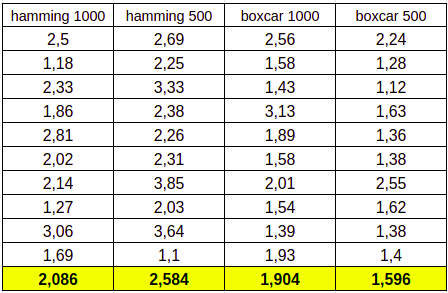

- Despues de hacer 10 pruebas de ms por cada filtro se obtuvo que el filtro mas eficiente es el boxcar 500 y el menos eficiente es el hamming 500.

Supongamos ahora que el hospital gasta muchisimo dinero en un nuevo sensor de mejor calidad. Se mide el ECG del mismo paciente usando el sensor nuevo.

Use esta nueva señal para medir la calidad de sus filtros. Evalue usando la métrica de error cuadrático medio
$$
\text{MSE} = \frac{1}{N} \sum_{i=1}^N (x_i - y_i)^2
$$

- Calcule el error cuadrático medio entre la señal limpia y las señales filtradas. ¿Cuál filtro tiene el mejor rendimiento en términos de MSE? ¿Cuál filtro tiene el peor rendimiento?
- Muestre en un gráfico los primeros cinco segundos de la señal limpia, la señal sucia y la mejor señal filtrada en términos de MSE. Comente respecto a este resultado

In [13]:
import pickle
with open("ECG_nueva.pkl", "rb") as f:
    data_clean = pickle.load(f)
suma1=0;suma2=0;suma3=0;suma4=0;
#Error cuadratico del hamming 1000
for i in range(0, len(data_clean), 1):
    suma=(data_clean[i]-data_filt1[i])**2;
    suma1=suma+suma1;
MSE1=suma1/len(data_clean);
#Error cuadratico del hamming 500
for i in range(0, len(data_clean), 1):
    suma=(data_clean[i]-data_filt2[i])**2;
    suma2=suma+suma2;
MSE2=suma2/len(data_clean);
#Error cuadratico del boxcar 1000
for i in range(0, len(data_clean), 1):
    suma=(data_clean[i]-data_filt3[i])**2;
    suma3=suma+suma3;
MSE3=suma3/len(data_clean);
#Error cuadratico del boxcar 500
for i in range(0, len(data_clean), 1):
    suma=(data_clean[i]-data_filt4[i])**2;
    suma4=suma+suma4;
MSE4=suma4/len(data_clean);

print("Filtro hamming 1000 = ",MSE1);print("Filtro hamming 500 = ",MSE2);print("Filtro boxcar 1000 = ",MSE3);print("Filtro boxcar 500 = ",MSE4)


Filtro hamming 1000 =  0.05666662143357437
Filtro hamming 500 =  0.05684926316712123
Filtro boxcar 1000 =  0.05676198421688661
Filtro boxcar 500 =  0.05683509736582942


- El filtro que tiene mejor rendimiento es el hamming 1000 y el que tiene peor rendimiento es el boxcar 500.

<IPython.core.display.Javascript object>


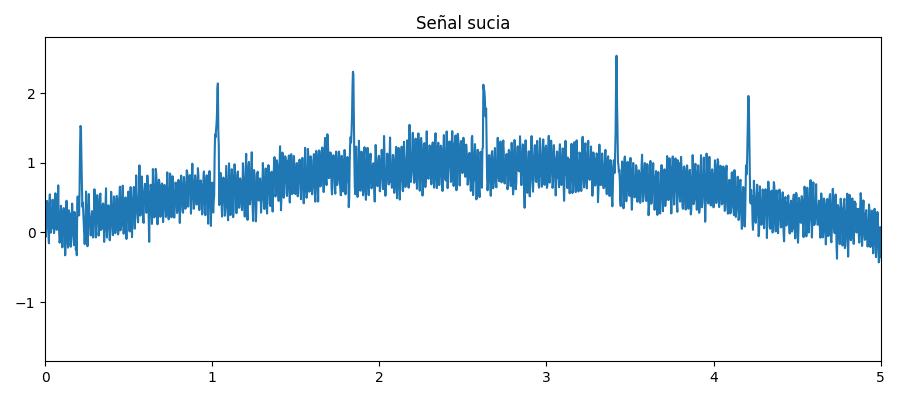

<IPython.core.display.Javascript object>


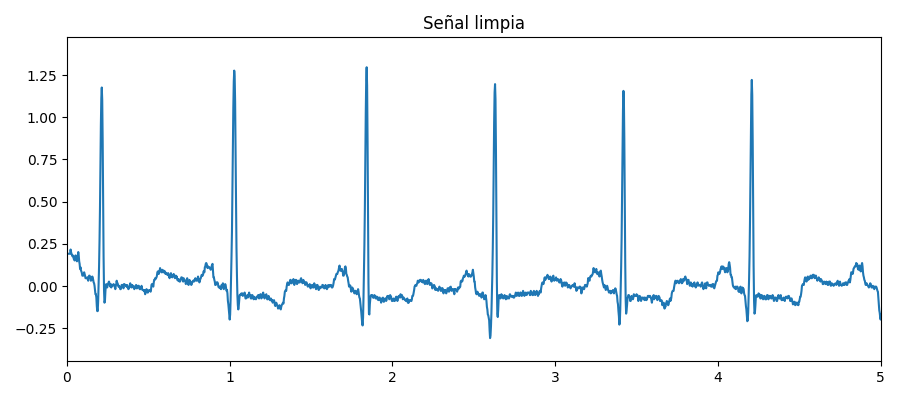

<IPython.core.display.Javascript object>


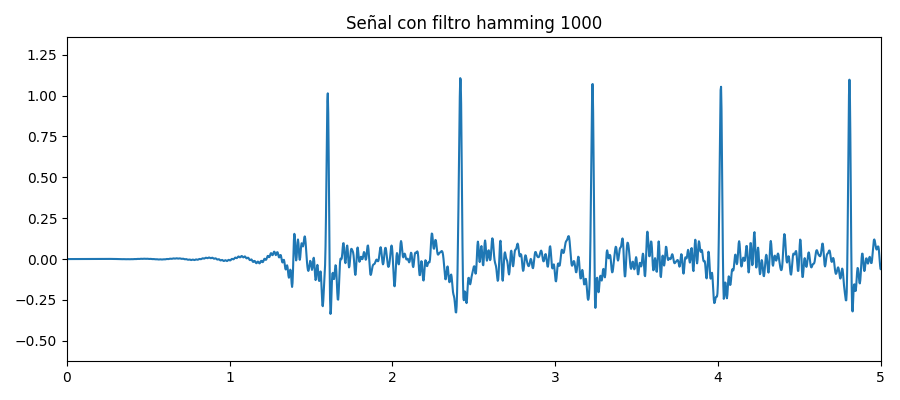

In [21]:
import pickle
with open("ECG_nueva.pkl", "rb") as f:
    data_clean = pickle.load(f)
fig, ax1 = plt.subplots(figsize=(9, 4), tight_layout=True)
fig, ax2 = plt.subplots(figsize=(9, 4), tight_layout=True)
fig, ax3 = plt.subplots(figsize=(9, 4), tight_layout=True)
#Grafico de señal sucia
ax1.plot(np.arange(len(data))/360, data);ax1.set_xlim([0.0,5.0]);ax1.set_title("Señal sucia");
#Grafico de señal limpia
ax2.plot(np.arange(len(data_clean))/360, data_clean);ax2.set_xlim([0.0,5.0]);ax2.set_title("Señal limpia");
#Grafico de señal filtrada
ax3.plot(np.arange(len(data_filt1))/360, data_filt1);ax3.set_xlim([0.0,5.0]);ax3.set_title("Señal con filtro hamming 1000");


# Analisis final
- Dependiendo donde se realice el encajonado el inicio de la muestra de impulsos inicia 1 seg mas tarde, pero si obsercamos la forma de la señal en comparacion con la señal limpia se observa una alta similitud. El ruido que aun queda dentro de la señal filtrada se puede inferir que es el ruido blanco que no se alcanzo a eliminar completamente.